In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [29]:
file1 = "Unemployment in India.csv"
file2 = "Unemployment_Rate_upto_11_2020.csv"

In [30]:
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

In [31]:
print("First dataset shape:", df1.shape)

First dataset shape: (768, 7)


In [32]:
print("Second dataset shape:", df2.shape)

Second dataset shape: (267, 9)


In [33]:
print("\nFirst dataset columns:")
print(df1.columns)
print("\nSecond dataset columns:")
print(df2.columns)


First dataset columns:
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

Second dataset columns:
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [34]:
print("\nFirst 5 rows of dataset 1:")
print(df1.head())
print("\nFirst 5 rows of dataset 2:")
print(df2.head())


First 5 rows of dataset 1:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  

First 5 rows of dataset 2:
           Region        

In [35]:
if 'Date' in df1.columns:
    df1['Date'] = pd.to_datetime(df1['Date'])
if 'Date' in df2.columns:
    df2['Date'] = pd.to_datetime(df2['Date'])

In [36]:
if 'Estimated Unemployment Rate (%)' in df1.columns:
    df1.rename(columns={'Estimated Unemployment Rate (%)': 'Unemployment_Rate'}, inplace=True)
if 'Unemployment Rate' in df2.columns:
    df2.rename(columns={'Unemployment Rate': 'Unemployment_Rate'}, inplace=True)

In [37]:
print("\nStatistical Summary Dataset 1:")
print(df1.describe())
print("\nStatistical Summary Dataset 2:")
print(df2.describe())


Statistical Summary Dataset 1:
       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)  
count                               740.000000  
mean                                 42.630122  
std                                   8.111094  
min                                  13.330000  
25%                                  38.062500  
50%                                  41.160000  
75%                                  45.505000  
max              

In [41]:
print(df1.columns)
print(df2.columns)

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')
Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [42]:
# Clean column names by removing extra spaces (just in case)
df1.rename(columns=lambda x: x.strip(), inplace=True)
df2.rename(columns=lambda x: x.strip(), inplace=True)

# Rename unemployment rate column for consistency
df1.rename(columns={'Estimated Unemployment Rate (%)': 'Unemployment_Rate'}, inplace=True)
df2.rename(columns={'Estimated Unemployment Rate (%)': 'Unemployment_Rate'}, inplace=True)

# Convert Date to datetime
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])


C:\Users\vvika\AppData\Local\Temp\ipykernel_18120\1415804061.py:10: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['Date'] = pd.to_datetime(df1['Date'])
C:\Users\vvika\AppData\Local\Temp\ipykernel_18120\1415804061.py:11: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['Date'] = pd.to_datetime(df2['Date'])


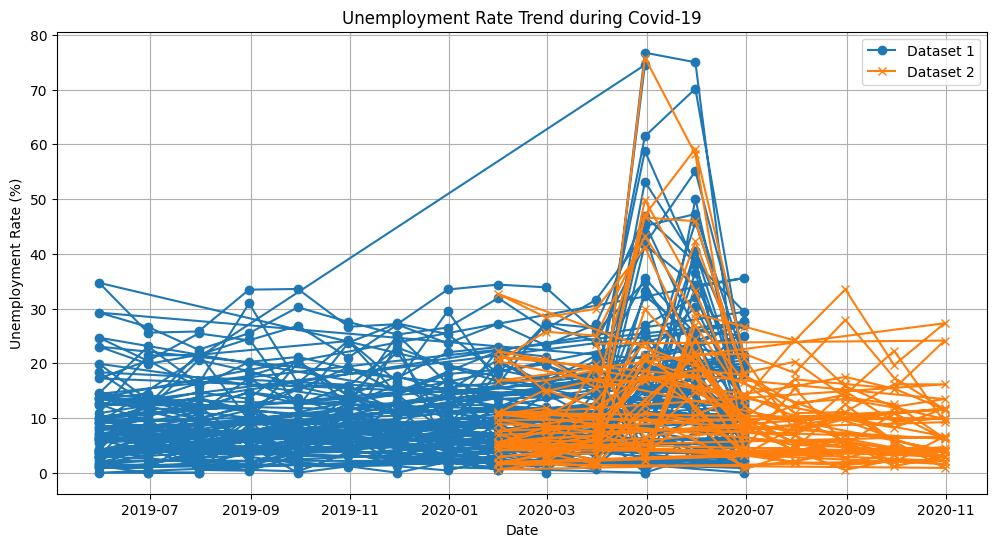

In [44]:
plt.figure(figsize=(12,6))
plt.plot(df1['Date'], df1['Unemployment_Rate'], label='Dataset 1', marker='o')
plt.plot(df2['Date'], df2['Unemployment_Rate'], label='Dataset 2', marker='x')
plt.title("Unemployment Rate Trend during Covid-19")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

In [45]:
df2 = df2.dropna(subset=['Unemployment_Rate'])

In [46]:
df2 = df2.sort_values('Date')
df2['Time_Index'] = np.arange(len(df2))

In [47]:
X = df2[['Time_Index']]
y = df2['Unemployment_Rate']

In [48]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [49]:
future_index = np.array([[len(df2)], [len(df2)+1], [len(df2)+2]])
predictions = model.predict(future_index)

C:\Users\vvika\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [50]:
print("\nPredicted Unemployment Rate for next 3 months:")
for i, pred in enumerate(predictions, start=1):
    print(f"Month +{i}: {pred:.2f}%")


Predicted Unemployment Rate for next 3 months:
Month +1: 10.23%
Month +2: 10.21%
Month +3: 10.20%


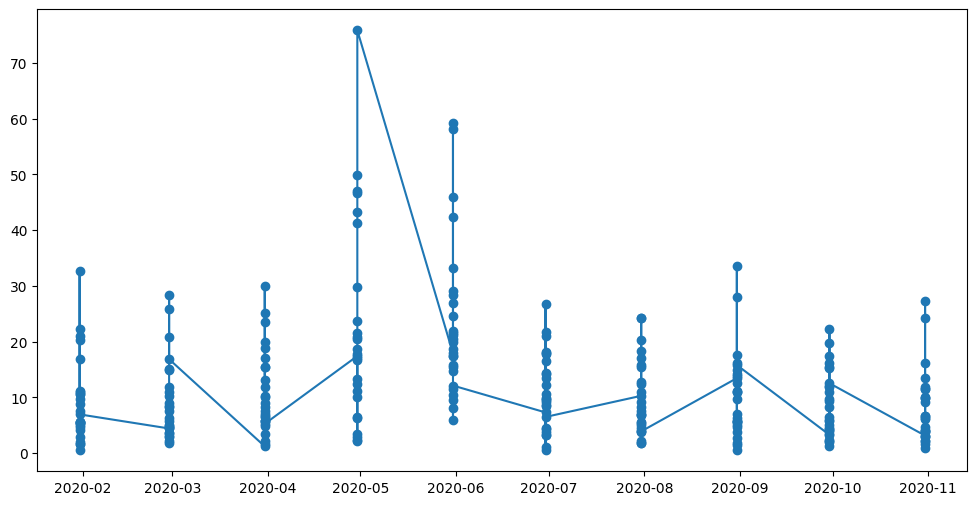

In [51]:
plt.figure(figsize=(12,6))
plt.plot(df2['Date'], y, label='Actual Rate', marker='o')

C:\Users\vvika\AppData\Local\Temp\ipykernel_18120\3674149573.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df2['Date'].iloc[-1] + pd.DateOffset(months=1), periods=3, freq='M')


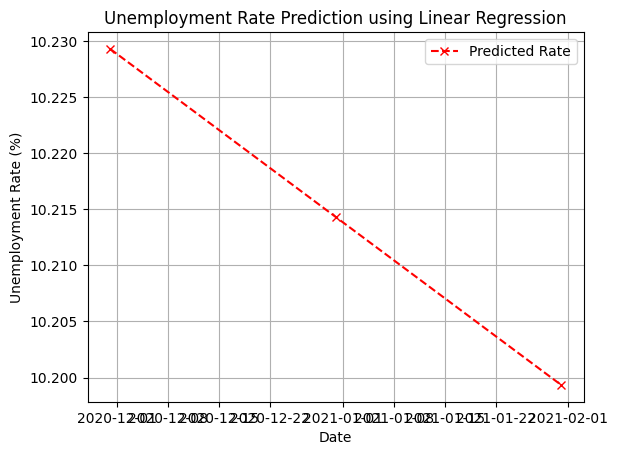

In [52]:
future_dates = pd.date_range(start=df2['Date'].iloc[-1] + pd.DateOffset(months=1), periods=3, freq='M')
plt.plot(future_dates, predictions, label='Predicted Rate', marker='x', linestyle='--', color='red')
plt.title("Unemployment Rate Prediction using Linear Regression")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.show()